In [1]:
import requests
from apiKey import open_data_api_key
import pandas as pd
from pandas import json_normalize
from PIL import Image
import urllib.request
import os
import xmltodict

In [2]:
def check (url):
    try:
        u = urllib.request.urlopen(url)
        u.close()
        return True
    except:
        return False

## Open Data Live Camera API Requests

In [5]:
headers_open_data = {
    "Accept": "application/json",
    "Authorization": "apikey" + " " + open_data_api_key
}

In [41]:
endpoint = 'https://api.transport.nsw.gov.au/v1/live/cameras'

In [42]:
req = requests.get(endpoint, headers = headers_open_data)
req.status_code

200

In [43]:
json_open_data = req.json()

In [22]:
json_open_data['features']

[{'type': 'Feature',
  'id': 'd2e386',
  'geometry': {'type': 'Point', 'coordinates': [151.10533, -34.02977]},
  'properties': {'region': 'SYD_SOUTH',
   'title': '5 Ways (Miranda)',
   'view': '5 ways at The Boulevarde looking west towards Sutherland.',
   'direction': 'W',
   'href': 'https://roads-waterways.transport.nsw.gov.au/trafficreports/cameras/camera_images/5ways.jpg'}},
 {'type': 'Feature',
  'id': 'd2e5699',
  'geometry': {'type': 'Point', 'coordinates': [151.23122, -33.90641]},
  'properties': {'region': 'SYD_MET',
   'title': 'Alison Road (Randwick)',
   'view': 'Alison Road at Darley Road looking north-west towards Anzac Parade.',
   'direction': 'N-W',
   'href': 'https://roads-waterways.transport.nsw.gov.au/trafficreports/cameras/camera_images/alisonrd_randwick.jpg'}},
 {'type': 'Feature',
  'id': 'd2e649',
  'geometry': {'type': 'Point', 'coordinates': [151.18022, -33.86789]},
  'properties': {'region': 'SYD_MET',
   'title': 'Anzac Bridge (Eastbound)',
   'view': 'In

In [44]:
df_open_data = json_normalize(json_open_data['features']) 
df_open_data.head()

,type,id,geometry.type,geometry.coordinates,properties.region,properties.title,properties.view,properties.direction,properties.href
0,Feature,d2e386,Point,"[151.10533, -34.02977]",SYD_SOUTH,5 Ways (Miranda),5 ways at The Boulevarde looking west towards ...,W,https://roads-waterways.transport.nsw.gov.au/t...
1,Feature,d2e5699,Point,"[151.23122, -33.90641]",SYD_MET,Alison Road (Randwick),Alison Road at Darley Road looking north-west ...,N-W,https://roads-waterways.transport.nsw.gov.au/t...
2,Feature,d2e649,Point,"[151.18022, -33.86789]",SYD_MET,Anzac Bridge (Eastbound),Intersection of Victoria Road and Anzac Bridge...,E,https://roads-waterways.transport.nsw.gov.au/t...
3,Feature,d2e4913,Point,"[151.22151, -33.89534]",SYD_MET,Anzac Parade (Moore Park),Corner of Anzac Parade and Cleveland Street lo...,S,https://roads-waterways.transport.nsw.gov.au/t...
4,Feature,d2e5786,Point,"[151.00533, -33.80866]",SYD_WEST,Victoria Road (Parramatta),Victoria Road at Church Street looking east to...,E,https://roads-waterways.transport.nsw.gov.au/t...


In [45]:
urls = df_open_data['properties.href']

In [46]:
query_round = '23'
for url in urls:
    new_name = url.split('/')[-1].split('.')[-2] + query_round + '.' + url.split('/')[-1].split('.')[-1]
    path_to_save = os.path.join('road_data/on_hold', new_name)
    urllib.request.urlretrieve(url, path_to_save)

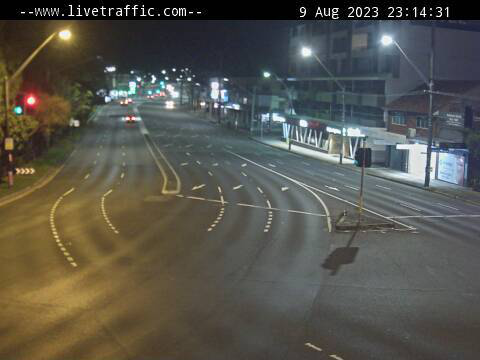

In [67]:
urllib.request.urlretrieve(urls[50], "im.jpg")
image = Image.open("im.jpg")
image

## Alberta API Requests

In [68]:
req_alberta = requests.get('https://511.alberta.ca/api/v2/get/cameras')
req_alberta.status_code

200

In [69]:
df_alberta = json_normalize(req_alberta.json())
df_alberta

,Id,Organization,RoadwayName,DirectionOfTravel,Latitude,Longitude,Name,Url,Status,Description,HasRWISData,AirTemperature,PavementTemperature,WindSpeed,WindDirection,RelativeHumidity,WeatherUpdated
0,1dgkqi3g2n0--1,Alberta511,Stoney Trail,Unknown,51.106617,-114.223475,Stoney Trail - Nose Hill Drive NW (W of E INT),https://511.alberta.ca/map/Cctv/1dgkqi3g2n0--1,Enabled,C134,False,None,None,None,None,None,None
1,1iwy3gl3zaj--1,Alberta511,Airport Trail,Unknown,51.139352,-114.001451,Airport Trail / Barlow Trail NE,https://511.alberta.ca/map/Cctv/1iwy3gl3zaj--1,Enabled,N/A,False,None,None,None,None,None,None
2,1p1zyhj1yfj--1,Alberta511,8 Ave,Unknown,51.042536,-114.033121,8 Ave / 12 Street SE,https://511.alberta.ca/map/Cctv/1p1zyhj1yfj--1,Enabled,N/A,False,None,None,None,None,None,None
3,3ljnm5kmpwv--1,Alberta511,Stoney Trail,Unknown,51.172817,-114.069036,Stoney Trail - Harvest Hills Boulevard N (N of...,https://511.alberta.ca/map/Cctv/3ljnm5kmpwv--1,Enabled,C137,False,None,None,None,None,None,None
4,3rvk2jmtvg4--1,Alberta511,James Walker Trail,Unknown,51.175914,-114.447483,Cochrane 3-E Tower View,https://511.alberta.ca/map/Cctv/3rvk2jmtvg4--1,Enabled,N/A,False,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
547,VTMS_AB_216-08C AHDNW HWY16.C3--20,WOOD,Hwy 216,Westbound,53.574600,-113.666000,Hwy 216: Anthony Henday Drive and Yellowhead T...,https://511.alberta.ca/map/Cctv/VTMS_AB_216-08...,Enabled,"SB Ramp, East side of Ramp",False,None,None,None,None,None,None
548,VTMS_AB_216-08C AHDNW HWY16.C4--20,WOOD,Hwy 216,Northbound,53.574600,-113.666000,Hwy 216: Anthony Henday Drive and Yellowhead T...,https://511.alberta.ca/map/Cctv/VTMS_AB_216-08...,Enabled,"SB Ramp, East side of Ramp",False,None,None,None,None,None,None
549,VTMS_AB_ABDOT_063-11C MEMORIAL BRIDGE.C1--20,WOOD,Hwy 63,Unknown,56.731900,-111.403000,Hwy 63: Memorial Bridge - North,https://511.alberta.ca/map/Cctv/VTMS_AB_ABDOT_...,Enabled,N/A,False,None,None,None,None,None,None
550,VTMS_AB_ABDOT_063-11C MEMORIAL BRIDGE.C2--20,WOOD,Hwy 63,Unknown,56.731900,-111.403000,N/A,https://511.alberta.ca/map/Cctv/VTMS_AB_ABDOT_...,Enabled,N/A,False,None,None,None,None,None,None


In [70]:
url_alberta = df_alberta['Url']
url_alberta

0         https://511.alberta.ca/map/Cctv/1dgkqi3g2n0--1
1         https://511.alberta.ca/map/Cctv/1iwy3gl3zaj--1
2         https://511.alberta.ca/map/Cctv/1p1zyhj1yfj--1
3         https://511.alberta.ca/map/Cctv/3ljnm5kmpwv--1
4         https://511.alberta.ca/map/Cctv/3rvk2jmtvg4--1
                             ...                        
547    https://511.alberta.ca/map/Cctv/VTMS_AB_216-08...
548    https://511.alberta.ca/map/Cctv/VTMS_AB_216-08...
549    https://511.alberta.ca/map/Cctv/VTMS_AB_ABDOT_...
550    https://511.alberta.ca/map/Cctv/VTMS_AB_ABDOT_...
551    https://511.alberta.ca/map/Cctv/VTMS_AB_ABDOT_...
Name: Url, Length: 552, dtype: object

In [71]:
query_round = '30'
for url in url_alberta:
    if check(url) == True:
        new_name = url.split('/')[-1] + query_round + '.jpeg'
        path_to_save = os.path.join('road_data/on_hold', new_name)
        urllib.request.urlretrieve(url, path_to_save)

## City of Vancouver API

In [15]:
url_v = 'https://opendata.vancouver.ca/api/records/1.0/search/?dataset=web-cam-url-links&q=&rows=115&facet=geo_local_area'
req_v = requests.get(url_v) 
req_v

<Response [200]>

In [17]:
req_v.json()['records']

[{'datasetid': 'web-cam-url-links',
  'recordid': '18e695c73655f8f3df122bfc6999c1030fd911bc',
  'fields': {'mapid': 'TCM007',
   'geo_point_2d': [49.2603889490707, -123.114967985868],
   'url': 'https://trafficcams.vancouver.ca/cambie12.htm',
   'name': 'Cambie St and W 12th Av',
   'geom': {'coordinates': [-123.114967985868, 49.2603889490707],
    'type': 'Point'},
   'geo_local_area': 'Fairview'},
  'geometry': {'type': 'Point',
   'coordinates': [-123.114967985868, 49.2603889490707]},
  'record_timestamp': '2023-08-14T12:23:21.15Z'},
 {'datasetid': 'web-cam-url-links',
  'recordid': '3a28e58dd85bc2997ee73cba1e0a2f15e01b7e81',
  'fields': {'mapid': 'TCM010',
   'geo_point_2d': [49.2084701202487, -123.130252725283],
   'url': 'https://trafficcams.vancouver.ca/oak4.htm',
   'name': 'Oak St and W 70th Av',
   'geom': {'coordinates': [-123.130252725283, 49.2084701202487],
    'type': 'Point'},
   'geo_local_area': 'Marpole'},
  'geometry': {'type': 'Point',
   'coordinates': [-123.130252

In [18]:
df_vancouver = json_normalize(req_v.json()['records'])
df_vancouver

,datasetid,recordid,record_timestamp,fields.mapid,fields.geo_point_2d,fields.url,fields.name,fields.geom.coordinates,fields.geom.type,fields.geo_local_area,geometry.type,geometry.coordinates
0,web-cam-url-links,18e695c73655f8f3df122bfc6999c1030fd911bc,2023-08-14T12:23:21.15Z,TCM007,"[49.2603889490707, -123.114967985868]",https://trafficcams.vancouver.ca/cambie12.htm,Cambie St and W 12th Av,"[-123.114967985868, 49.2603889490707]",Point,Fairview,Point,"[-123.114967985868, 49.2603889490707]"
1,web-cam-url-links,3a28e58dd85bc2997ee73cba1e0a2f15e01b7e81,2023-08-14T12:23:21.15Z,TCM010,"[49.2084701202487, -123.130252725283]",https://trafficcams.vancouver.ca/oak4.htm,Oak St and W 70th Av,"[-123.130252725283, 49.2084701202487]",Point,Marpole,Point,"[-123.130252725283, 49.2084701202487]"
2,web-cam-url-links,8b8353cbbda863f8b96c63d05da27f7b029fad78,2023-08-14T12:23:21.15Z,TCM017,"[49.2811264797669, -123.030835801938]",https://trafficcams.vancouver.ca/cassiarHastin...,Cassiar Connector and E Hastings St,"[-123.030835801938, 49.2811264797669]",Point,Hastings-Sunrise,Point,"[-123.030835801938, 49.2811264797669]"
3,web-cam-url-links,661eb4f7ee942d063af9a936c438d20b86364289,2023-08-14T12:23:21.15Z,TCM021,"[49.2335434721856, -123.116192190431]",https://trafficcams.vancouver.ca/cambie41.htm,Cambie St and W 41st Av,"[-123.116192190431, 49.2335434721856]",Point,South Cambie,Point,"[-123.116192190431, 49.2335434721856]"
4,web-cam-url-links,71fb96d3cc49c43e8dbf6c20bf5424589c918b52,2023-08-14T12:23:21.15Z,TCM022,"[49.248990875309, -123.115406053889]",https://trafficcams.vancouver.ca/cambie25.htm,Cambie St and W King Edward Av,"[-123.115406053889, 49.248990875309]",Point,South Cambie,Point,"[-123.115406053889, 49.248990875309]"
...,...,...,...,...,...,...,...,...,...,...,...,...
110,web-cam-url-links,3f7c9536336981ac0bf495d7544cbf65bd0a5076,2023-08-14T12:23:21.15Z,TCM139,"[49.262703, -123.100776]",https://trafficcams.vancouver.ca/mainBroadway.htm,Main St and E Broadway,"[-123.100776, 49.262703]",Point,Mount Pleasant,Point,"[-123.100776, 49.262703]"
111,web-cam-url-links,51553849c53a78112ba8057d6a2c6adf579e4ec0,2023-08-14T12:23:21.15Z,TCM142,"[49.225182, -123.065737]",https://trafficcams.vancouver.ca/victoria49.htm,Victoria Drive and E 49th Av,"[-123.065737, 49.225182]",Point,Victoria-Fraserview,Point,"[-123.065737, 49.225182]"
112,web-cam-url-links,96f3d7aacc1271ac98d77e503e56aded4a063ca3,2023-08-14T12:23:21.15Z,TCM145,"[49.234332, -123.139589]",https://trafficcams.vancouver.ca/granville41.htm,Granville St.and W 41st Av,"[-123.139589, 49.234332]",Point,Shaughnessy,Point,"[-123.139589, 49.234332]"
113,web-cam-url-links,31e900dd361b045a76905cd1c461bf9def7d90c0,2023-08-14T12:23:21.15Z,TCM146,"[49.280312, -123.121422]",https://trafficcams.vancouver.ca/granvilleSmit...,Granville St and Smithe St,"[-123.121422, 49.280312]",Point,Downtown,Point,"[-123.121422, 49.280312]"


In [22]:
df_vancouver['fields.url'].iloc[100:]

100    https://trafficcams.vancouver.ca/collectorsBri...
101     https://trafficcams.vancouver.ca/cambie2West.htm
102     https://trafficcams.vancouver.ca/cambie2East.htm
103           https://trafficcams.vancouver.ca/oak12.htm
104    https://trafficcams.vancouver.ca/oakWBroadway.htm
105    https://trafficcams.vancouver.ca/richardsHasti...
106    https://trafficcams.vancouver.ca/richardsDunsm...
107    https://trafficcams.vancouver.ca/victoriaVicto...
108      https://trafficcams.vancouver.ca/rupert03rd.htm
109    https://trafficcams.vancouver.ca/hornbyNelson.htm
110    https://trafficcams.vancouver.ca/mainBroadway.htm
111      https://trafficcams.vancouver.ca/victoria49.htm
112     https://trafficcams.vancouver.ca/granville41.htm
113    https://trafficcams.vancouver.ca/granvilleSmit...
114    https://trafficcams.vancouver.ca/nanaimoGrandv...
Name: fields.url, dtype: object

In [26]:
url_list = [
    'https://trafficcams.vancouver.ca/cameraimages/Cambie12North.jpg',
    'https://trafficcams.vancouver.ca/cameraimages/Cambie12East.jpg',
    'https://trafficcams.vancouver.ca/cameraimages/Cambie12South.jpg',
    'https://trafficcams.vancouver.ca/cameraimages/Cambie12West.jpg',
    'https://trafficcams.vancouver.ca/cameraimages/Oak70north.jpg',
    'https://trafficcams.vancouver.ca/cameraimages/Oak70EastEast.jpg',
    'https://trafficcams.vancouver.ca/cameraimages/Oakbridge.jpg',
    'https://trafficcams.vancouver.ca/cameraimages/Oak70EastWest.jpg',
    'https://trafficcams.vancouver.ca/cameraimages/CambieNorth_41.jpg',
    'https://trafficcams.vancouver.ca/cameraimages/41East_Cambie.jpg',
    'https://trafficcams.vancouver.ca/cameraimages/CambieSouth_41.jpg',
    'https://trafficcams.vancouver.ca/cameraimages/41West_Cambie.jpg',
    'https://trafficcams.vancouver.ca/cameraimages/CambieNorth_King_Edward.jpg',
    'https://trafficcams.vancouver.ca/cameraimages/King_EdwardEast_Cambie.jpg',
    'https://trafficcams.vancouver.ca/cameraimages/CambieSouth_King_Edward.jpg',
    'https://trafficcams.vancouver.ca/cameraimages/King_EdwardWest_Cambie.jpg',
    'https://trafficcams.vancouver.ca/cameraimages/MainNorth_Hastings.jpg',
    'https://trafficcams.vancouver.ca/cameraimages/HastingsEast_Main.jpg',
    'https://trafficcams.vancouver.ca/cameraimages/MainSouth_Hastings.jpg',
    'https://trafficcams.vancouver.ca/cameraimages/HastingsWest_Main.jpg',
    'https://trafficcams.vancouver.ca/cameraimages/HornbyNorth_Robson.jpg',
    'https://trafficcams.vancouver.ca/cameraimages/RobsonEast_Hornby.jpg',
    'https://trafficcams.vancouver.ca/cameraimages/HornbySouth_Robson.jpg',
    'https://trafficcams.vancouver.ca/cameraimages/RobsonWest_Hornby.jpg',
    'https://trafficcams.vancouver.ca/cameraimages/BeattyNorthSmithe.jpg',
    'https://trafficcams.vancouver.ca/cameraimages/SmitheEastBeatty.jpg',
    'https://trafficcams.vancouver.ca/cameraimages/BeattySouthSmithe.jpg',
    'https://trafficcams.vancouver.ca/cameraimages/SmitheWestBeatty.jpg',
    'https://trafficcams.vancouver.ca/cameraimages/Kingsway10North.jpg',
    'https://trafficcams.vancouver.ca/cameraimages/Kingsway10East.jpg',
    'https://trafficcams.vancouver.ca/cameraimages/Kingsway10South.jpg',
    'https://trafficcams.vancouver.ca/cameraimages/Kingsway10West.jpg',
    'https://trafficcams.vancouver.ca/cameraimages/AngusMarineWest.jpg',
    'https://trafficcams.vancouver.ca/cameraimages/AngusMarineEast.jpg',
    'https://trafficcams.vancouver.ca/cameraimages/AngusMarineNorth.jpg',
    'https://trafficcams.vancouver.ca/cameraimages/HoweDrakeNorth.jpg',
    'https://trafficcams.vancouver.ca/cameraimages/HoweDrakeEast.jpg',
    'https://trafficcams.vancouver.ca/cameraimages/HoweDrakeSouth.jpg',
    'https://trafficcams.vancouver.ca/cameraimages/HoweDrakeWest.jpg',
    'https://trafficcams.vancouver.ca/cameraimages/Ross41North.jpg',
    'https://trafficcams.vancouver.ca/cameraimages/Ross41East.jpg',
    'https://trafficcams.vancouver.ca/cameraimages/Ross41South.jpg',
    'https://trafficcams.vancouver.ca/cameraimages/Ross41West.jpg',
    'https://trafficcams.vancouver.ca/cameraimages/Boundary22North.jpg',
    'https://trafficcams.vancouver.ca/cameraimages/Boundary22East.jpg',
    'https://trafficcams.vancouver.ca/cameraimages/Boundary22South.jpg',
    'https://trafficcams.vancouver.ca/cameraimages/Boundary22West.jpg',
    'https://trafficcams.vancouver.ca/cameraimages/HornbyDrakeNorth.jpg',
    'https://trafficcams.vancouver.ca/cameraimages/HornbyDrakeEast.jpg',
    'https://trafficcams.vancouver.ca/cameraimages/HornbyDrakeSouth.jpg',
    'https://trafficcams.vancouver.ca/cameraimages/HornbyDrakeWest.jpg',
    'https://trafficcams.vancouver.ca/cameraimages/Manitoba02North.jpg',
    'https://trafficcams.vancouver.ca/cameraimages/Manitoba02East.jpg',
    'https://trafficcams.vancouver.ca/cameraimages/Manitoba02South.jpg',
    'https://trafficcams.vancouver.ca/cameraimages/Manitoba02West.jpg',
    'https://trafficcams.vancouver.ca/cameraimages/Ash10North.jpg',
    'https://trafficcams.vancouver.ca/cameraimages/Ash10East.jpg',
    'https://trafficcams.vancouver.ca/cameraimages/Ash10South.jpg',
    'https://trafficcams.vancouver.ca/cameraimages/Ash10West.jpg',
    'https://trafficcams.vancouver.ca/cameraimages/MainMarineNorth.jpg',
    'https://trafficcams.vancouver.ca/cameraimages/MainMarineEast.jpg',
    'https://trafficcams.vancouver.ca/cameraimages/MainMarineSouth.jpg',
    'https://trafficcams.vancouver.ca/cameraimages/MainMarineWest.jpg',
    'https://trafficcams.vancouver.ca/cameraimages/georgiaE.jpg',
    'https://trafficcams.vancouver.ca/cameraimages/GrandviewRupertnorth.jpg',
    'https://trafficcams.vancouver.ca/cameraimages/GrandviewRuperteast.jpg',
    'https://trafficcams.vancouver.ca/cameraimages/GrandviewRupertsouth.jpg',
    'https://trafficcams.vancouver.ca/cameraimages/GrandviewRupertwest.jpg',
    'https://trafficcams.vancouver.ca/cameraimages/KnightNorth_E41.jpg',
    'https://trafficcams.vancouver.ca/cameraimages/KnightSouth_E41.jpg',
    'https://trafficcams.vancouver.ca/cameraimages/E41East_Knight.jpg',
    'https://trafficcams.vancouver.ca/cameraimages/E41West_Knight.jpg',
    'https://trafficcams.vancouver.ca/cameraimages/KnightNorth_E57.jpg',
    'https://trafficcams.vancouver.ca/cameraimages/E57East_Knight.jpg',
    'https://trafficcams.vancouver.ca/cameraimages/KnightSouth_E57.jpg',
    'https://trafficcams.vancouver.ca/cameraimages/E57West_Knight.jpg',
    'https://trafficcams.vancouver.ca/cameraimages/MainNorth_E33.jpg',
    'https://trafficcams.vancouver.ca/cameraimages/E33East_Main.jpg',
    'https://trafficcams.vancouver.ca/cameraimages/MainSouth_E33.jpg',
    'https://trafficcams.vancouver.ca/cameraimages/E33West_Main.jpg',
    'https://trafficcams.vancouver.ca/cameraimages/CambieMarineNorth.jpg',
    'https://trafficcams.vancouver.ca/cameraimages/CambieMarineEast.jpg',
    'https://trafficcams.vancouver.ca/cameraimages/CambieMarineWest.jpg',
    'https://trafficcams.vancouver.ca/cameraimages/CambieMarineSouth.jpg',
    'https://trafficcams.vancouver.ca/cameraimages/clark12north.jpg',
    'https://trafficcams.vancouver.ca/cameraimages/clark12east.jpg',
    'https://trafficcams.vancouver.ca/cameraimages/clark12south.jpg',
    'https://trafficcams.vancouver.ca/cameraimages/clark12west.jpg',
    'https://trafficcams.vancouver.ca/cameraimages/Marine41MarineEast.jpg',
    'https://trafficcams.vancouver.ca/cameraimages/BurrardDrakeNorth.jpg',
    'https://trafficcams.vancouver.ca/cameraimages/BurrardDrakeEast.jpg',
    'https://trafficcams.vancouver.ca/cameraimages/BurrardDrakeSouth.jpg',
    'https://trafficcams.vancouver.ca/cameraimages/BurrardDrakeWest.jpg',
    'https://trafficcams.vancouver.ca/cameraimages/Quebec02North.jpg',
    'https://trafficcams.vancouver.ca/cameraimages/Quebec02East.jpg',
    'https://trafficcams.vancouver.ca/cameraimages/Quebec02South.jpg',
    'https://trafficcams.vancouver.ca/cameraimages/Quebec02West.jpg',
    'https://trafficcams.vancouver.ca/cameraimages/HowePacificNorth.jpg',
    'https://trafficcams.vancouver.ca/cameraimages/HowePacificEast.jpg',
    'https://trafficcams.vancouver.ca/cameraimages/HowePacificSouth.jpg',
    'https://trafficcams.vancouver.ca/cameraimages/HowePacificWest.jpg',
    'https://trafficcams.vancouver.ca/cameraimages/Granville16North.jpg',
    'https://trafficcams.vancouver.ca/cameraimages/Granville16East.jpg',
    'https://trafficcams.vancouver.ca/cameraimages/Granville16South.jpg',
    'https://trafficcams.vancouver.ca/cameraimages/Granville16West.jpg',
    'https://trafficcams.vancouver.ca/cameraimages/Kerr54South.jpg',
    'https://trafficcams.vancouver.ca/cameraimages/Kerr54North.jpg',
    'https://trafficcams.vancouver.ca/cameraimages/Cambie02WestNorth.jpg',
    'https://trafficcams.vancouver.ca/cameraimages/Cambie02WestEast.jpg',
    'https://trafficcams.vancouver.ca/cameraimages/Cambie02WestSouth.jpg',
    'https://trafficcams.vancouver.ca/cameraimages/Cambie02WestWest.jpg',
    'https://trafficcams.vancouver.ca/cameraimages/Cambie02EastNorth.jpg',
    'https://trafficcams.vancouver.ca/cameraimages/Cambie02EastEast.jpg',
    'https://trafficcams.vancouver.ca/cameraimages/Cambie02EastSouth.jpg',
    'https://trafficcams.vancouver.ca/cameraimages/Cambie02EastWest.jpg',
    'https://trafficcams.vancouver.ca/cameraimages/Oak12North.jpg',
    'https://trafficcams.vancouver.ca/cameraimages/Oak12East.jpg',
    'https://trafficcams.vancouver.ca/cameraimages/Oak12South.jpg',
    'https://trafficcams.vancouver.ca/cameraimages/Oak12West.jpg',
    'https://trafficcams.vancouver.ca/cameraimages/HornbyNelsonSouth.jpg',
    'https://trafficcams.vancouver.ca/cameraimages/HornbyNelsonEast.jpg',
    'https://trafficcams.vancouver.ca/cameraimages/HornbyNelsonWest.jpg',
    'https://trafficcams.vancouver.ca/cameraimages/Rupert03North.jpg',
    'https://trafficcams.vancouver.ca/cameraimages/Rupert03East.jpg',
    'https://trafficcams.vancouver.ca/cameraimages/Rupert03South.jpg',
    'https://trafficcams.vancouver.ca/cameraimages/Rupert03West.jpg',
    'https://trafficcams.vancouver.ca/cameraimages/MainBroadwayNorth.jpg',
    'https://trafficcams.vancouver.ca/cameraimages/MainBroadwayEast.jpg',
    'https://trafficcams.vancouver.ca/cameraimages/MainBroadwaySouth.jpg',
    'https://trafficcams.vancouver.ca/cameraimages/MainBroadwayWest.jpg',
    'https://trafficcams.vancouver.ca/cameraimages/Granville41North.jpg',
    'https://trafficcams.vancouver.ca/cameraimages/Granville41East.jpg',
    'https://trafficcams.vancouver.ca/cameraimages/Granville41South.jpg',
    'https://trafficcams.vancouver.ca/cameraimages/Granville41West.jpg'
]

In [27]:
query_round = '1'
for url in url_list:
    new_name = url.split('/')[-1].split('.')[-2] + query_round + '.' + url.split('/')[-1].split('.')[-1]
    path_to_save = os.path.join('road_data/on_hold', new_name)
    urllib.request.urlretrieve(url, path_to_save)